In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats
from datetime import datetime
import sklearn.preprocessing as preproc

In [2]:
df=pd.read_csv('ORG_LSTSPEC.csv')


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df

,DATAFLOW,LAST UPDATE,freq,animals,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2015,15697,NaN
1,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2016,18161,NaN
2,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2017,17273,NaN
3,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2018,17752,NaN
4,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2019,18678,NaN
...,...,...,...,...,...,...,...,...,...
5355,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A6900,HD,TR,2015,0,NaN
5356,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A6900,HD,TR,2016,0,NaN
5357,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A6900,HD,TR,2017,0,NaN
5358,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A6900,HD,TR,2018,0,NaN


In [4]:
df['unit'].unique()

array(['HD', 'NR'], dtype=object)

In [5]:
#df['unit'] =(df['unit'] == 'HD').astype(int)

In [6]:
#df

In [7]:
#df.groupby(['geo']).mean()

In [8]:
#df.groupby('geo')['geo'].agg('count')

In [9]:
#df.groupby('animals')['animals'].agg('count')

In [10]:

#df.rename(index= {"A1100":"Live horses","A2000":"Live bovine animals","A2000B":"Bovine animals for slaughter","A2300F":"Dairy cows","A2900":"Other bovine animals","A3100":"Live swine, domestic species","A3120":"Breeding sows, live weight 50 kg or over","A3130":"Other pigs","A3132":"Fattening pigs, live weight 50 kg or over","A4100":"Live sheep","A4110":"Ewes and ewe-lambs, breeding females","A4110K":"Ewes and ewe-lambs put to the ram","A4120":"Other sheep","A4200":"Live goats","A4210":"Goats, breeding females","A4220":"Other goats","A5000":"Live poultry","A5000X5110O_5140":"Live poultry excluding laying hens and broilers","A5110O":"Laying hens","A5110OH":"Laying hens (producing eggs for consumption)","A5140":"Broilers","A6110":"Rabbits","A6710R":"Bees (hives)","A6900":"Other live animals"}, inplace = True)
#df

In [11]:
#df.dtypes

In [12]:
df = df.drop(['DATAFLOW','LAST UPDATE', 'freq','OBS_FLAG'], axis =1)
df.head(5)

,animals,unit,geo,TIME_PERIOD,OBS_VALUE
0,A1100,HD,AT,2015,15697
1,A1100,HD,AT,2016,18161
2,A1100,HD,AT,2017,17273
3,A1100,HD,AT,2018,17752
4,A1100,HD,AT,2019,18678


In [22]:
df.tail()

,animals,unit,geo,TIME_PERIOD,OBS_VALUE
5355,A6900,HD,TR,2015,0
5356,A6900,HD,TR,2016,0
5357,A6900,HD,TR,2017,0
5358,A6900,HD,TR,2018,0
5359,A6900,HD,TR,2019,0


In [13]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,5360.000000,5.360000e+03
mean,2016.193097,2.442407e+05
std,2.609682,1.446925e+06
min,2012.000000,0.000000e+00
25%,2014.000000,5.230000e+02
50%,2016.000000,6.562500e+03
75%,2018.000000,5.098275e+04
max,2021.000000,4.266108e+07


In [14]:
df.count()

animals        5360
unit           5360
geo            5360
TIME_PERIOD    5360
OBS_VALUE      5360
dtype: int64

In [15]:
#df['geo'].value_counts()

In [16]:
#df =df.groupby('geo', axis =0).sum()
#print(df)

In [17]:
#df['TIME_PERIOD'].value_counts()

In [18]:
df.shape

(5360, 5)

In [19]:
df.isnull().values.any()

False

In [20]:
df.isnull().sum()

animals        0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

# Data Visualization

In [21]:
df.columns

Index(['animals', 'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

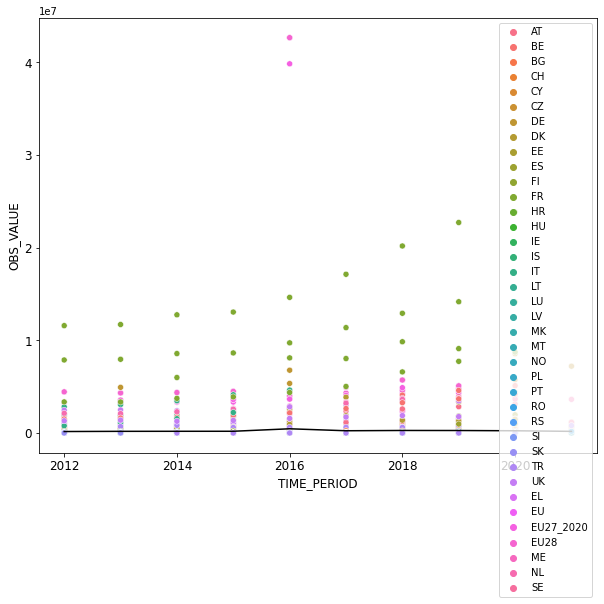

In [25]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x= "TIME_PERIOD",
                    y = "OBS_VALUE",
                    hue = "geo",
                    legend = "full",
                    data = df)

max_price_per_symboling = df.groupby("TIME_PERIOD")["OBS_VALUE"].mean()
sns.lineplot(data = max_price_per_symboling,
            ax = ax.axes,
            color="black")
ax.tick_params(axis='both', which="major", labelsize=12)
plt.xlabel("TIME_PERIOD", fontsize=12)
plt.ylabel("OBS_VALUE", fontsize=12)
plt.show()

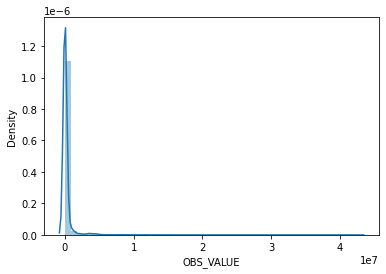

In [26]:
import seaborn as sns
sns.distplot(df["OBS_VALUE"]);


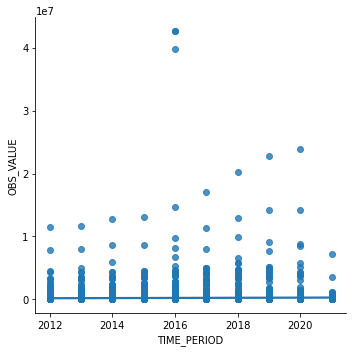

In [27]:
sns.lmplot(x = "TIME_PERIOD", y = "OBS_VALUE", data = df, ci = 75)

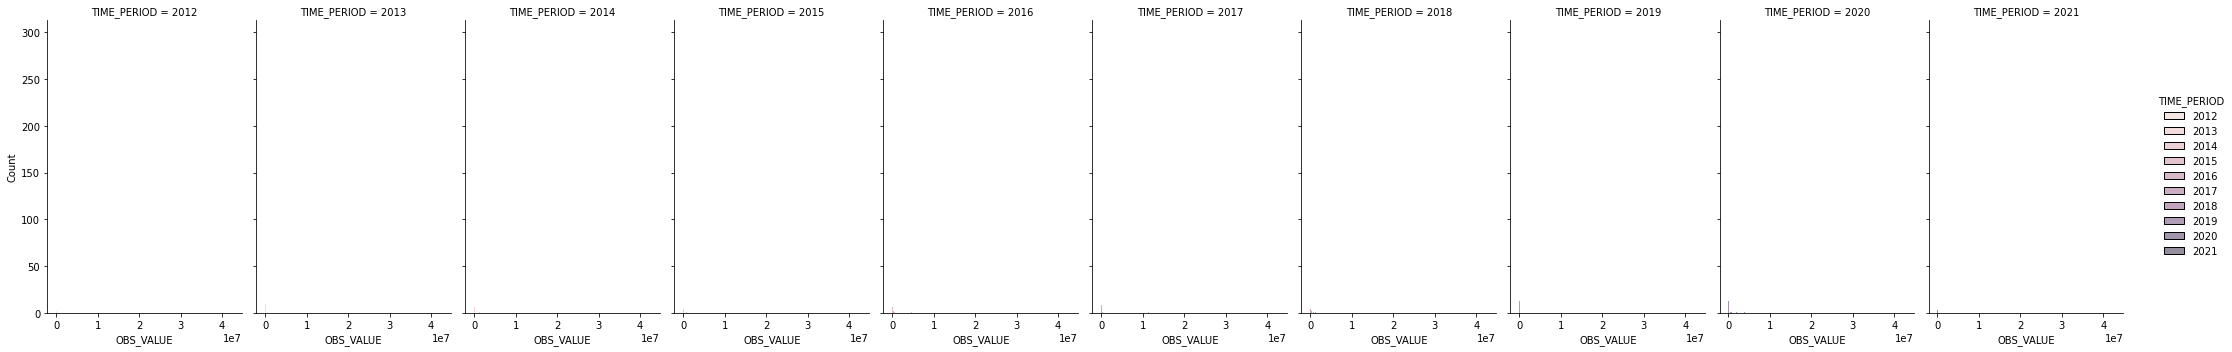

In [36]:
sns.displot(df, x = "OBS_VALUE", hue = "TIME_PERIOD", col='TIME_PERIOD',
           height=5, aspect=0.6)

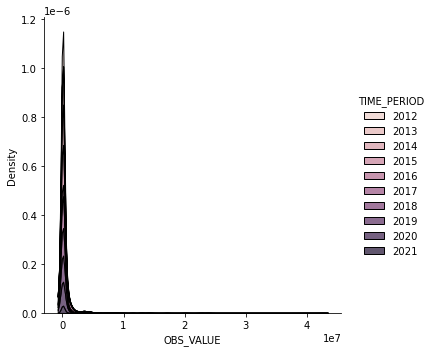

In [34]:
sns.displot(df, x = "OBS_VALUE", kind = 'kde', hue = "TIME_PERIOD", multiple= 'stack')

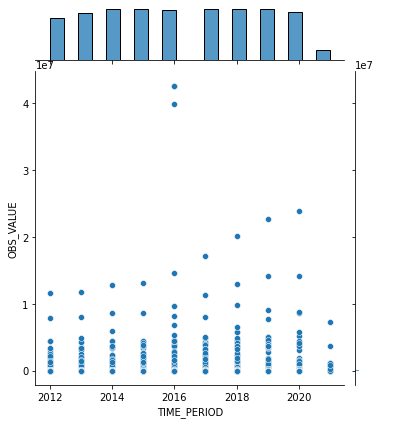

In [57]:
sns.jointplot(x='TIME_PERIOD', y='OBS_VALUE', data=df);

In [ ]:
sns.distplot()

# Outliers
Outliers are the datapoint which are data errors or sometimes they are not data error but they just represent the extreme variations in the dataset so although they are valid itmakes sense to remove them otherwise they can create some issues later. we can use different techiques to tackle with them like using standard deviation or we can use simple domain knowledge.

<AxesSubplot:xlabel='OBS_VALUE'>

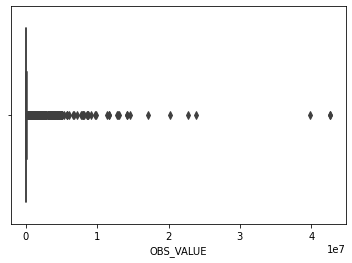

In [22]:
sns.boxplot(x=df["OBS_VALUE"])

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
df.shape

(5360, 5)

In [24]:
# Remove column name 'A'
#df=df.drop(['OBS_FLAG'], axis = 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animals      5360 non-null   object
 1   unit         5360 non-null   object
 2   geo          5360 non-null   object
 3   TIME_PERIOD  5360 non-null   int64 
 4   OBS_VALUE    5360 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 209.5+ KB


array([[<AxesSubplot:title={'center':'OBS_VALUE'}>]], dtype=object)

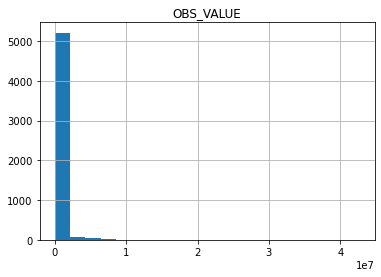

In [26]:
df.hist(column='OBS_VALUE', bins =20)

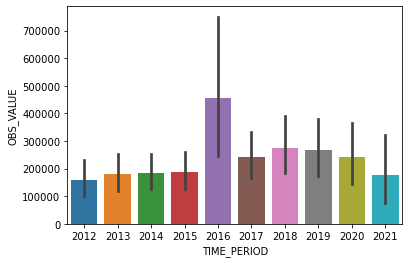

In [27]:
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df )

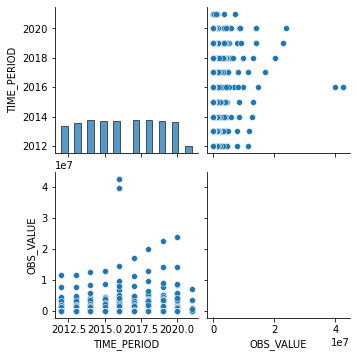

In [28]:
import seaborn as sns
sns.pairplot(df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animals      5360 non-null   object
 1   unit         5360 non-null   object
 2   geo          5360 non-null   object
 3   TIME_PERIOD  5360 non-null   int64 
 4   OBS_VALUE    5360 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 209.5+ KB


creating multi plots on the same canvas.

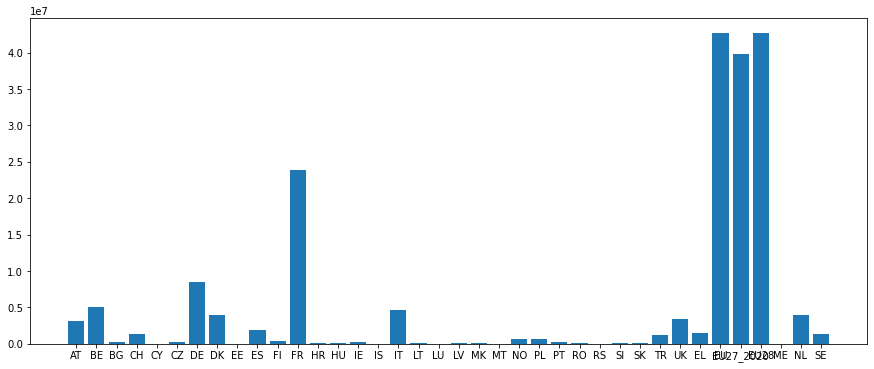

In [30]:
fig, b = plt.subplots(figsize=(15,6))
b = plt.bar(df['geo'], df['OBS_VALUE'])

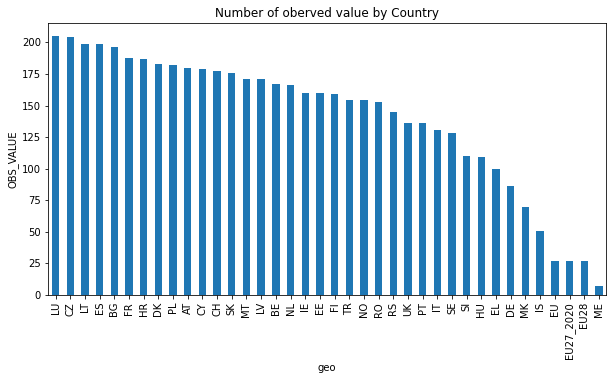

In [31]:
df.geo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of oberved value by Country")
plt.ylabel("OBS_VALUE")
plt.xlabel("geo");

plt.figure() is 
object oriented method and this is going to be much better.
The main idea in using the more formal object oriented method is to create figure objects and then just call methods off of this. Let me go in and show you what I mean by that.(20 is width and 10 is height


,TIME_PERIOD,OBS_VALUE
TIME_PERIOD,1.000000,0.020557
OBS_VALUE,0.020557,1.000000


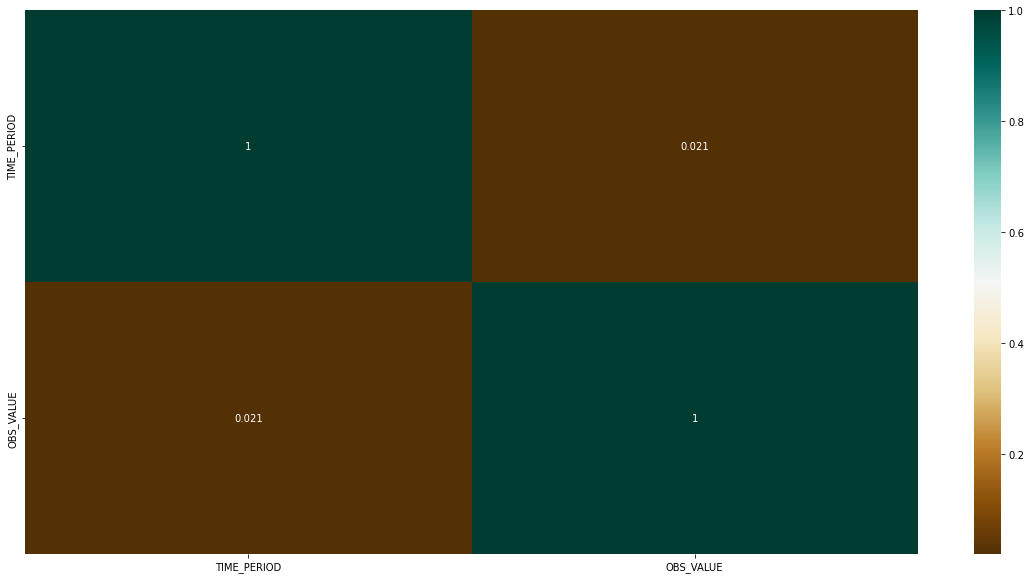

In [32]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

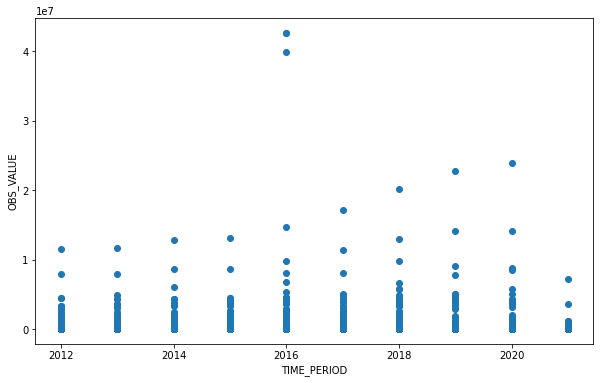

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["TIME_PERIOD"], df["OBS_VALUE"])
ax.set_xlabel("TIME_PERIOD")
ax.set_ylabel("OBS_VALUE")
plt.show()

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TIME_PERIOD,5360.0,2016.193097,2.609682e+00,2012.0,2014.0,2016.0,2018.00,2021.0
OBS_VALUE,5360.0,244240.666791,1.446925e+06,0.0,523.0,6562.5,50982.75,42661084.0


## Statistics

In [36]:
from numpy.random import randn
np.random.seed(101)

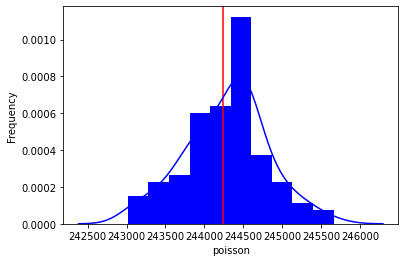

In [37]:
import statistics
from scipy.stats import poisson

x = poisson.rvs(mu = 2.442407e+05, size = 101)
plt.axvline(2.442407e+05, color = 'red')
ax = sns.distplot(x, kde= True, color ='blue', hist_kws ={"linewidth":25, 'alpha':1})
ax.set(xlabel='poisson', ylabel='Frequency')
plt.show()

In [38]:
import statistics
from scipy.stats import norm
norm.pdf(1, loc = 2.442407e+05, scale=1.446925e+06 )

2.718171385602083e-07

[Text(0.5, 0, 'geo'),
 Text(0, 0.5, 'OBS_VALUE'),
 Text(0.5, 1.0, 'Organic meat per country')]

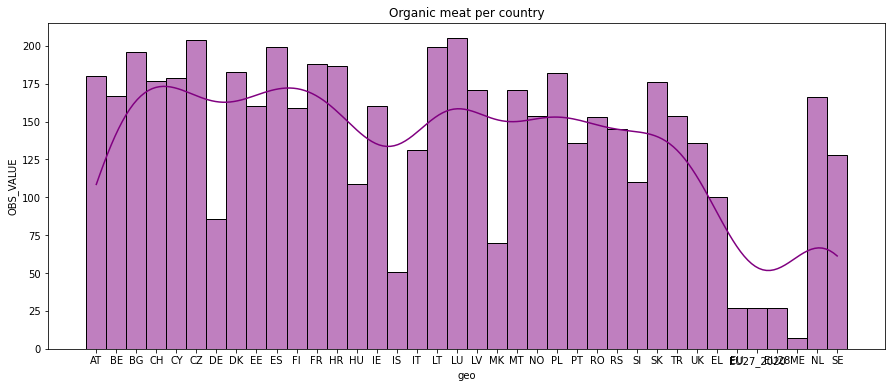

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.histplot(df['geo'],  kde=True, color ='Purple', bins=50)
ax.set(xlabel='geo', ylabel='OBS_VALUE', title ='Organic meat per country')

In [40]:
#sns.histplot(df)

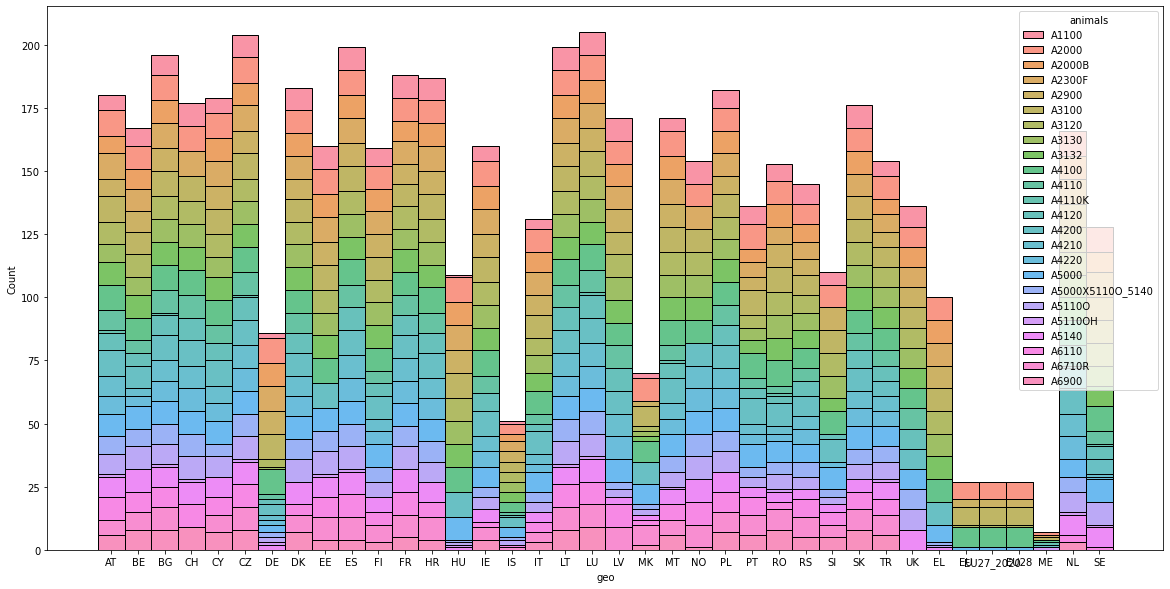

In [41]:
fig, g = plt.subplots(figsize=(20,10))
g=sns.histplot(data=df, x='geo', hue ="animals", multiple="stack")
